In [1]:
import numpy as np
import matplotlib.pyplot as plt
from solver.interior_point import InteriorPointMethod
from solver.path_following import PathFollowing
import pandas as pd
from collections import OrderedDict

In [2]:
def graph_2d(equations, x, x_iter, x_parallel=None, y_parallel=None, figsize=(10, 10), xlim=5, ylim=5):
    x1 = []
    y1 = []

    for x_ in x_iter:
        x1.append(x_[0])
        y1.append(x_[1])

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    
    if x_parallel is not None:
        for y_line in x_parallel:
            plt.axhline(y=y_line)
            plt.fill_between(0, y_line, x, alpha=0.5)

    if y_parallel is not None:
        for x_line in y_parallel:
            plt.axvline(x=x_line)
            plt.fill_between(x_line, 0, x, alpha=0.5)
            
    
    for (x, y) in equations:
        plt.plot(x, y, lw=1)
        plt.fill_between(x, 0, y, alpha=0.5)

    for (x_, y_) in zip(x1, y1):
        plt.plot(x_, y_, 'x', color='k')
    plt.plot(x1, y1, lw=1, label='Interior Point', color='k')

    # add non-negativity constraints
    plt.plot(np.zeros_like(x), x, lw=1, label='y non-negative')
    plt.plot(x, np.zeros_like(x), lw=1, label='x non-negative')

    # labels and stuff
    # ax.set_aspect('equal')
    ax.grid(True, which='both')

    plt.xlabel('x', fontsize=16)
    plt.ylabel('y', fontsize=16)
    plt.xlim(0, xlim)
    plt.ylim(0, ylim)

    handles, labels = ax.get_legend_handles_labels()

    plt.legend(handles=handles, fontsize=14)
    plt.show()

## Example 1

$
\begin{align}
    \max \quad & x_{1} + 2x_{2} \\
    \textrm{s.t.} \quad & x_{1} + s_{1} &= 2.3 \\
    \quad & 2x_{1} + 2x_{2} + s_{2} &= 10 \\
    \quad & 4x_{1} + x_{2} + s_{3} &= 10 \\
    \quad & 4x_{1} + 2x_{2} + s_{4} &= 12 \\
    \quad & x_{1} + 2.2x_{2} + s_{5} &= 10 \\
    \quad & x_{1}, x_{2} & \geq 0
\end{align}
$

In [ ]:
A = np.asarray(np.asmatrix('1, 0, 1, 0, 0, 0, 0; \
                         2, 2, 0, 1, 0, 0, 0; \
                         4, 1, 0, 0, 1, 0, 0; \
                         4, 2, 0, 0, 0, 1, 0; \
                         1, 2.2, 0, 0, 0, 0, 1'), dtype=np.float64)
b = np.asarray([2.3, 10, 10, 12, 10], dtype=np.float64)
c = np.asarray([-1, -2, 0, 0, 0, 0, 0], dtype=np.float64)

epsilon = 1e-3

ipm = InteriorPointMethod(A, b, c)
x_ipm, x_ipm_iter = ipm.solve(theta=0.95, gamma=0.01, epsilon=epsilon)
print(ipm.print_metric())

In [ ]:
x = np.linspace(0, 50)
eqs = []
eqs.append((x, 5-x))
eqs.append((x, 10 - 4*x))
eqs.append((x, 6 - 2*x))
eqs.append((x, (10 - x)/2.2))

y_parallel = [2.3]
graph_2d(eqs, x, x_ipm_iter, y_parallel=y_parallel, xlim=3, ylim=6)

## Example 2

$
\begin{align}
    \max \quad & 2x_{1} + 2x_{2} \\
    \textrm{s.t.} \quad & x_{1} + x_{2} + s_{1} &= 3 \\
    \quad & x_{1}, x_{2} & \geq 0
\end{align}
$

In [ ]:
A = np.asarray(np.matrix('1 1 1'), dtype=np.float64)
b = np.asarray([3], dtype=np.float64)
c = np.asarray([-2, -2, 0], dtype=np.float64)

epsilon = 1e-3
ipm = InteriorPointMethod(A, b, c)
x_ipm, x_ipm_iter = ipm.solve(theta=0.95, gamma=0.01, epsilon=epsilon)
print(ipm.print_metric())

In [ ]:
x = np.linspace(0, 50)
eqs = []

eqs.append((x, 3 - x))
graph_2d(eqs, x, x_ipm_iter, xlim=3, ylim=3)

## Example 3

$
\begin{align}
    \max \quad & 3x_{1} + 5x_{2} \\
    \textrm{s.t.} \quad & x_{1} + s_{1} &= 4 \\
    \quad & 2x_{2} + s_{2} &= 12 \\
    \quad & 3x_{1} + 2x_{2} + s_{3} &= 18 \\
    \quad & x_{1}, x_{2} & \geq 0
\end{align}
$

In [ ]:
A = np.asarray(np.matrix('1 0 1 0 0; 0 2 0 1 0; 3 2 0 0 1'), dtype=np.float64)
b = np.asarray([4, 12, 18], dtype=np.float64)
c = np.asarray([-3, -5, 0, 0, 0], dtype=np.float64)

epsilon = 1e-3
ipm = InteriorPointMethod(A, b, c)
x_ipm, x_ipm_iter = ipm.solve(theta=0.95, gamma=0.01, epsilon=epsilon)
print(ipm.print_metric())

In [ ]:
x = np.linspace(0, 50)
eqs = []
eqs.append((x, (18 - 3*x) / 2))

y_parallel = [4]
x_parallel = [6]
graph_2d(eqs, x, x_ipm_iter, y_parallel=y_parallel, xlim=7, ylim=10)

In [9]:
A = np.asarray(np.matrix('1 1 1 0; 0 1 0 1'), dtype=np.float64)
b = np.asarray([2, 1], dtype=np.float64)
c = np.asarray([-2, -1, 0, 0], dtype=np.float64)

epsilon = 1e-3
ipm = InteriorPointMethod(A, b, c, init_val=1.0)
x_ipm, x_ipm_iter = ipm.solve(theta=0.9, gamma=0.1, epsilon=epsilon)
ipm.print_metric()

Iteration -> 0
-----------------------------------------------------
Delta Y -> 0
-----------------------------------------------------
Delta S -> 0
-----------------------------------------------------
Delta X -> 0
-----------------------------------------------------
Alpha k -> 1.0
-----------------------------------------------------
Ax - b = [1. 1.] 
-----------------------------------------------------
Norm of Ax - b -> 1.4142135623730951 
-----------------------------------------------------
Coordinates -> [1. 1. 1. 1.]
-----------------------------------------------------
Y Values -> [0. 0.]
-----------------------------------------------------
S Values -> [1. 1. 1. 1.]
-----------------------------------------------------
Functional value -> -3.0
Iteration -> 1
-----------------------------------------------------
Delta Y -> [-1.28 -0.46]
-----------------------------------------------------
Delta S -> [-1.72 -0.26  0.28 -0.54]
--------------------------------------------------

True

In [10]:
ipm.get_metric()

OrderedDict([(0,
              {'alpha_k': 1.0,
               'alpha_s': 1.0,
               'alpha_x': 1.0,
               'delta_s': 0,
               'delta_x': 0,
               'delta_y': 0,
               'diff': array([1., 1.]),
               'diff_norm': 1.4142135623730951,
               'iter_num': 0,
               'm': None,
               'obj_val': -3.0,
               'r': None,
               's_val': array([1., 1., 1., 1.]),
               'x_val': array([1., 1., 1., 1.]),
               'y_val': array([0., 0.])}),
             (1,
              {'alpha_k': 0.4709302325581396,
               'alpha_s': 0.5232558139534884,
               'alpha_x': 0.7627118644067795,
               'delta_s': array([-1.72, -0.26,  0.28, -0.54]),
               'delta_x': array([ 0.82, -0.64, -1.18, -0.36]),
               'delta_y': array([-1.28, -0.46]),
               'diff': array([0.23728814, 0.23728814]),
               'diff_norm': 0.335576099546158,
               'iter_num': 

In [11]:
data_rows = []
for iter_iter in ipm.get_metric().values():
    new_dict = OrderedDict()
    new_dict['Iteration'] = iter_iter['iter_num']
    new_dict['x1'] = iter_iter['x_val'][0]
    new_dict['x2'] = iter_iter['x_val'][1]
    new_dict['x3'] = iter_iter['x_val'][2]
    new_dict['x4'] = iter_iter['x_val'][3]
    new_dict['xTs'] = np.dot(iter_iter['x_val'].T, iter_iter['s_val'])
    new_dict['s1'] = iter_iter['s_val'][0]
    new_dict['s2'] = iter_iter['s_val'][1]
    new_dict['s3'] = iter_iter['s_val'][2]
    new_dict['s4'] = iter_iter['s_val'][3]
    new_dict['y1'] = iter_iter['y_val'][0]
    new_dict['y2'] = iter_iter['y_val'][1]
    new_dict['alpha_k'] = iter_iter['alpha_k']
    new_dict['alpha_x'] = iter_iter['alpha_x']
    new_dict['alpha_s'] = iter_iter['alpha_s']
    new_dict['Objective Value'] = iter_iter['obj_val']
    data_rows.append(new_dict)
df = pd.DataFrame(data_rows)
df

,Iteration,x1,x2,x3,x4,xTs,s1,s2,s3,s4,y1,y2,alpha_k,alpha_x,alpha_s,Objective Value
0,0,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-3.000000
1,1,1.625424,0.511864,0.100000,0.725424,1.239870,0.100000,0.863953,1.146512,0.717442,-0.602791,-0.216628,0.470930,0.762712,0.523256,-3.762712
2,2,1.847603,0.234526,0.010000,0.857603,0.321360,0.024940,0.836195,1.764451,0.071744,-1.370246,-0.003232,0.550568,0.611742,0.726805,-3.929732
3,3,1.991924,0.023453,0.004687,0.996611,0.050345,0.005645,0.970082,1.962907,0.007174,-1.814899,0.002914,0.703998,0.782220,0.835933,-4.007301
4,4,1.998220,0.002822,0.000965,0.999185,0.008807,0.001115,0.998677,1.996842,0.001836,-1.965327,-0.000453,0.810000,0.900000,0.900000,-3.999262
5,5,1.999530,0.000476,0.000194,0.999724,0.001666,0.000210,1.000163,1.999783,0.000381,-1.993501,-0.000264,0.810000,0.900000,0.900000,-3.999536
6,6,1.999897,0.000085,0.000038,0.999935,0.000316,0.000040,1.000072,1.999997,0.000075,-1.998782,-0.000084,0.810000,0.900000,0.900000,-3.999879


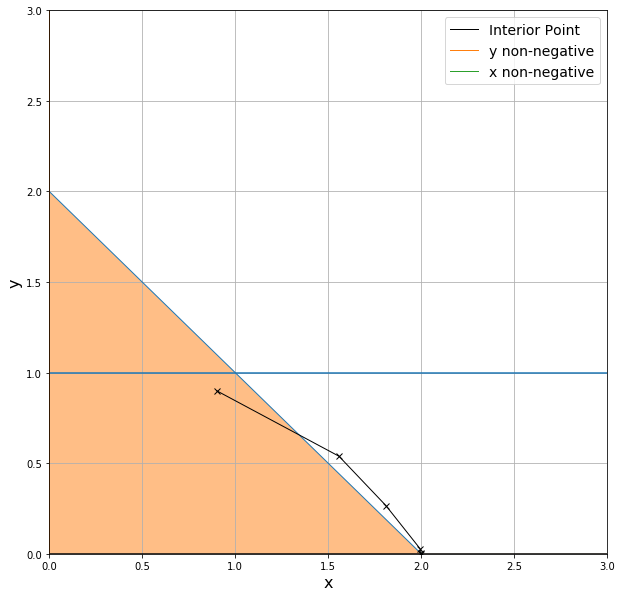

In [6]:
x = np.linspace(0, 50)
eqs = []
eqs.append((x, 2 - x))

x_parallel = [1]
graph_2d(eqs, x, x_ipm_iter, x_parallel=x_parallel, xlim=3, ylim=3)

In [ ]:
A = np.asarray(np.matrix('4 3 1 0 0; 4 1 0 1 0; 4 -1 0 0 1'), dtype=np.float64)
b = np.asarray([12, 8, 8], dtype=np.float64)
c = np.asarray([-3, -2, 0, 0, 0], dtype=np.float64)

epsilon = 1e-3
ipm = InteriorPointMethod(A, b, c)
x_ipm, x_ipm_iter = ipm.solve(theta=0.9, gamma=0.1, epsilon=epsilon)
ipm.print_metric()